# Project Details

Fully assessing and cleaning the entire dataset would require exceptional effort so only a subset of its issues (eight quality issues and two tidiness issues at minimum) needed to be assessed and cleaned.

The tasks for this project were:

* Data wrangling, which consists of:
  * Gathering data
  * Assessing data
  * Cleaning data
* Storing, analyzing, and visualizing our wrangled data
* Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings

---

# Gathering Data

1. **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

**1. Twitter archive file**

In [572]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [573]:
twitter_archive.sort_values('timestamp')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [574]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**2. Tweet image prediction**

In [575]:
# This if statement is used to prevent this cell to be run twice.
if False:
    #URL downloaded programatically 
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    response = requests.get(url)

    with open('image-predictions.tsv', mode ='wb') as file:
        file.write(response.content)

In [576]:
#Read TSV file
image_prediction_original = pd.read_csv('image-predictions.tsv', sep='\t' )

In [577]:
image_prediction_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [578]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

auth = tweepy.OAuthHandler('XXX', 'XXX')
auth.set_access_token('XXX', 'XXX')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


**3. Twitter API & JSON**

https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api

In [579]:
# Using the tweet IDs in the Twitter archive, query the Twitter API for each tweet's JSON

# This if statement is used to prevent this cell to be run twice.
if False:
    start = time.time() # start timer

    with open('getstatus_error.txt', 'w') as errfile: 
        valid_ids = 0
        err_ids = 0
        tweet_ids = twitter_archive.tweet_id
        with open('tweet_json.txt', 'w', encoding='utf-8') as outfile:
            for i, tweet_id in tweet_ids.iteritems():
                try:
                    print("%s# %s" % (str(i+1), tweet_id))
                    # Get tweet data using Twitter API
                    tweet = api.get_status(tweet_id, tweet_mode='extended')
                    json_content = tweet

                    # Write each tweet's JSON data to its own line in a file
                    json.dump(json_content, outfile)
                    outfile.write('\n')
                    valid_ids += 1
                except tweepy.TweepError as e:
                    err_ids += 1
                    err_str = []
                    err_str.append(str(tweet_id))
                    err_str.append(': ')
                    err_str.append(e.response.json()['errors'][0]['message'])
                    err_str.append('\n')
                    errfile.write(''.join(err_str))
                    print(''.join(err_str))
                    continue
            print("%s %s" % ('Valid tweets:', valid_ids))
            print("%s %s" % ('Error tweets:', err_ids))

    end = time.time() # end timer
    print((end - start)/(1000*60))

In [580]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
df_list = []
with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

# Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
status_df_original = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

---

# Assessing Data

In [581]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
1402,699423671849451520,NaN,NaN,2016-02-16 02:42:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't ever talk to me or my son again."" ...bo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/699423671...,10,10,None,None,None,None,None
1881,675003128568291329,NaN,NaN,2015-12-10 17:24:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Laela. She's adorable. Magnificent eyes. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675003128...,12,10,Laela,None,None,None,None
994,748568946752774144,NaN,NaN,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cora. She rings a bell for treats. 12/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748568946...,12,10,Cora,None,None,None,None


`twitter_archive` (Twitter archive) columns:
- **tweet_id**: the unique identifier for each tweet
- **in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID
- **timestamp**: time when this Tweet was created
- **source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client
- **text**: actual UTF-8 text of the status update
- **retweeted_status_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID
- **retweeted_status_user_id**: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID
- **retweeted_status_timestamp**: time of retweet
- **expanded_urls**: tweet URL
- **rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10
- **rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10
- **name**: name of the dog
- **doggo**: one of the 4 dog "stage"
- **floofer**: one of the 4 dog "stage"
- **pupper**: one of the 4 dog "stage"
- **puppo**: one of the 4 dog "stage"

In [582]:
# Get the number of retweet
len(twitter_archive[twitter_archive.retweeted_status_id.isnull() == False])

181

In [583]:
# Check if there are any records in arc_df whose corresponding record with same tweet_id is missing in image_prediction_original table
len(twitter_archive[~twitter_archive.tweet_id.isin(image_prediction_original.tweet_id)])

281

In [584]:
# Sort by rating_denominator values
twitter_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [585]:
# Sort by rating_numerator values
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [586]:
twitter_archive.name.value_counts().sort_index(ascending=False)

very             5
unacceptable     1
this             1
the              8
such             1
space            1
quite            4
one              4
old              1
officially       1
not              2
my               1
mad              2
light            1
life             1
just             4
infuriating      1
incredibly       1
his              1
getting          2
by               1
an               7
all              1
actually         2
a               55
Zuzu             1
Zooey            1
Zoey             3
Zoe              1
Ziva             1
                ..
Apollo           1
Antony           1
Anthony          1
Anna             1
Angel            1
Andy             1
Andru            1
Anakin           2
Amélie           1
Amy              1
Ambrose          1
Amber            1
Alice            2
Alfy             1
Alfie            5
Alf              1
Alexanderson     1
Alexander        1
Alejandro        1
Aldrick          1
Albus            2
Albert      

In [587]:
# Number of records whose both doggo and floofer columns are not None
len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.floofer != 'None')])

1

In [588]:
# Number of records whose both doggo and pupper columns are not None
len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.pupper != 'None')])

12

In [589]:
# Number of records whose both doggo and pupper columns are not None
len(twitter_archive[(twitter_archive.doggo != 'None') & (twitter_archive.puppo != 'None')])

1

In [590]:
# Number of records whose both floofer and pupper columns are not None
len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.pupper != 'None')])

0

In [591]:
# Number of records whose both floofer and puppo columns are not None
len(twitter_archive[(twitter_archive.floofer != 'None') & (twitter_archive.puppo != 'None')])

0

In [592]:
# Number of records whose both pupper and puppo columns are not None
len(twitter_archive[(twitter_archive.pupper != 'None') & (twitter_archive.puppo != 'None')])

0

In [593]:
image_prediction_original.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
998,708469915515297792,https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg,1,Chihuahua,0.748163,True,toy_terrier,0.127717,True,Pembroke,0.042141,True
711,685315239903100929,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,2,chow,0.470162,True,Pomeranian,0.159677,True,Eskimo_dog,0.105074,True
1202,741303864243200000,https://pbs.twimg.com/media/Ckmj7mNWYAA4NzZ.jpg,1,Chihuahua,0.768156,True,pug,0.014902,True,Pekinese,0.012816,True
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True
1943,861383897657036800,https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg,1,Cardigan,0.771008,True,Pembroke,0.137174,True,French_bulldog,0.063309,True


`image_prediction_original` (tweet image predictions) columns:
- **tweet_id**: the unique identifier for each tweet
- **jpg_url**: dog's image URL
- **img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- **p1**: algorithm's #1 prediction for the image in the tweet
- **p1_conf**: how confident the algorithm is in its #1 prediction
- **p1_dog**: whether or not the #1 prediction is a breed of dog
- **p2**: algorithm's #2 prediction for the image in the tweet
- **p2_conf**: how confident the algorithm is in its #2 prediction
- **p2_dog**: whether or not the #2 prediction is a breed of dog
- **p3**: algorithm's #3 prediction for the image in the tweet
- **p3_conf**: how confident the algorithm is in its #3 prediction
- **p3_dog**: whether or not the #3 prediction is a breed of dog

In [594]:
image_prediction_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [595]:
status_df_original.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
1780,677269281705472000,740,2050,"[0, 96]"
1726,679405845277462528,1267,2457,"[0, 96]"
838,765371061932261376,2313,7444,"[0, 112]"
1190,715758151270801409,1499,3845,"[0, 122]"
590,798628517273620480,2131,0,"[0, 131]"


`status_df_original` (tweet status) columns:
- **id**: the unique identifier for each tweet
- **retweet_count**: number of times this Tweet has been retweeted
- **favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users
- **display_text_range**: an array of two unicode code point indices, identifying the inclusive start and exclusive end of the displayable content of the Tweet

In [596]:
status_df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 4 columns):
tweet_id              2339 non-null int64
retweet_count         2339 non-null int64
favorite_count        2339 non-null int64
display_text_range    2339 non-null object
dtypes: int64(3), object(1)
memory usage: 73.2+ KB


### Quality
##### `twitter_archive` (Twitter archive) table
- contains retweets and therefore, duplicates
- many *tweet_id*(s) of `twitter_archive` table are missing in `image_prediction_original` (image predictions) table
- erroneous datatypes (*in_reply_to_status_id, in_reply_to_user_id and timestamp* columns)
- unnecessary html tags in *source* column in place of utility name e.g. `<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>`
- *text* column contains untruncated text instead of displayable text
- *rating_denominator* column has values other than 10
- erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)
- `twitter_archive` without any duplicates (i.e. retweets) will have empty *retweeted_status_id, retweeted_status_user_id* and *retweeted_status_timestamp* columns, which can be dropped

### Tidiness
- *doggo, floofer, pupper* and *puppo* columns in `twitter_archive` table should be merged into one column named *"stage"*
- *"breed"* column should be added in `twitter_archive` table; its values based on *p1_conf* and *p1_dog* columns of `image_prediction_original` (image predictions) table
- The third rule of tidy data says: "each type of observational unit forms a table". The *retweet_count* and *favorite_count* from `status_df_original` (tweet status) table are part of the same observational unit as `twitter_archive` table so should be merged into the same table and stored in a file called twitter_archive_master.csv

---

## Cleaning Data

In [597]:
# Take a copy of twitter_archive on which the cleaning tasks will be performed
archive_clean = twitter_archive.copy()

status_df = status_df_original.copy()
image_prediction = image_prediction_original.copy()

### Quality

#### `twitter_archive`: contains retweets and therefore, duplicates

##### Define
Keep only those rows in `twitter_archive` table that are original tweets and NOT retweets (i.e. *retweeted_status_id* column is null). Delete the rest.

##### Code

In [598]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

##### Test

In [599]:
len(archive_clean[archive_clean.retweeted_status_id.isnull() == False])

0

#### `twitter_archive`: many *tweet_id*(s) of `twitter_archive` table are missing in `image_prediction` (image predictions) table

##### Define
Keep only those records in `twitter_archive` table whose *tweet_id* exists in `image_prediction` table

##### Code

In [600]:
archive_clean = archive_clean[archive_clean.tweet_id.isin(image_prediction.tweet_id)]

##### Test

In [601]:
len(archive_clean[~archive_clean.tweet_id.isin(image_prediction.tweet_id)])

0

#### `twitter_archive` table without any duplicates (i.e. retweets) have empty *retweeted_status_id, retweeted_status_user_id* and *retweeted_status_timestamp* columns, which can be dropped

In [602]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: float64(4), int64(3), object(1

##### Define
Drop *retweeted_status_id, retweeted_status_user_id* and *retweeted_status_timestamp* columns from `twitter_archive` table

#### Code

In [603]:
archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [604]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 233.7+ KB


#### `twitter_archive`: erroneous datatypes (*in_reply_to_status_id, in_reply_to_user_id* and *timestamp* columns)

##### Define
Convert *in_reply_to_status_id* and *in_reply_to_user_id* to data type integer. Convert *timestamp* to datetime data type. Convert *rating_numerator* and *rating_denominator* to data type float.

##### Code

In [605]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.fillna(0)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.fillna(0)

archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(np.int64)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(np.int64)

archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

archive_clean.rating_numerator = archive_clean.rating_numerator.astype(np.float)
archive_clean.rating_denominator = archive_clean.rating_denominator.astype(np.float)

##### Test

In [606]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null int64
in_reply_to_user_id      1994 non-null int64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 233.7+ KB


####  `twitter_archive`: unnecessary html tags in *source* column in place of utility name e.g. `<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>`

##### Define
Strip all html anchor tags (i.e. `<a..></a>`) in *source* column and retain just the text in between the tags. Convert the datatype from string to categorical.

#### Code

In [607]:
archive_clean.source = archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [608]:
archive_clean.source = archive_clean.source.astype('category')

#### Test

In [609]:
archive_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### `twitter_archive`: *text* column contains untruncated text instead of displayable text

##### Define
Using the *display_text_range* of `status_df` table, extract displayable text from text column

##### Code

In [610]:
# Before extraction: untruncated text of first 3 records
print(archive_clean.iloc[0].text)
print(archive_clean.iloc[1].text)
print(archive_clean.iloc[2].text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB


In [611]:
# merge status_df's display_text_range column to archive_clean to extract text using range values
archive_clean = pd.merge(archive_clean, status_df[['tweet_id', 'display_text_range']], on='tweet_id')

In [612]:
# using display_text_range of archive_clean, extract displayable text
for i, row in archive_clean.iterrows():
    text_range = row.display_text_range
    display_text = row.text[text_range[0]:text_range[1]]
    archive_clean.set_value(i, 'text', display_text)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [613]:
# drop display_text_range column
archive_clean.drop('display_text_range', axis=1, inplace=True)

##### Test

In [614]:
# After extraction: first 3 records now show displayable text
print(archive_clean.iloc[0].text)
print(archive_clean.iloc[1].text)
print(archive_clean.iloc[2].text)  

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10


#### `twitter_archive`: *rating_denominator* column has values other than 10

##### Define
Standardized the denominator to be 10.

##### Code

In [615]:
# regex to match fractions
pattern = "\s*(\d+([.]\d+)?([/]\d+))"

# function which will match the above pattern and return an array of fractions, if any
def tokens(x):
  return [m.group(1) for m in re.finditer(pattern, x)]

In [616]:
# iterate through all those records whose rating_denominator is not 10
for i, row in archive_clean[archive_clean.rating_denominator != 10].iterrows():
    d = row.rating_denominator
    
    # if rating_denominator is greater than 10 and divisible by 10
    if d > 10 and d%10 == 0:
        # assign divisor as the quotient
        divisor = d/10
        n = row.rating_numerator
        
        # if rating_numerator is greater than 10 and divisible by the divisor
        if n%divisor == 0:
            # reassign rating_denominator as 10
            archive_clean.set_value(i, 'rating_denominator', 10)
            # reassign rating_numerator as the quotient of rating_numerator by divisor
            archive_clean.set_value(i, 'rating_numerator', int(n/divisor))
    
    # for all those records whose rating_denominator is either less than 10 or not divisible by 10
    else:
        # extract all fractions(ratings) from text using tokens function
        ratings = tokens(row.text)
        # iterate through all the fractions
        for rating in ratings:
            # if denominator of any such fraction is equal to 10
            if rating.split('/')[1] == '10':
                # reassign rating_denominator as 10
                archive_clean.set_value(i, 'rating_denominator', 10)
                # reassign rating_numerator as the numerator value of this fraction
                archive_clean.set_value(i, 'rating_numerator', int(round(float(rating.split('/')[0]))))
                break

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


##### Test

In [617]:
archive_clean.rating_denominator.value_counts()

10.0    1990
7.0        1
Name: rating_denominator, dtype: int64

#### `twitter_archive`: the more intuitive rating indicator *rating* column doesn't exist

##### Define
Create a rating column where `rating = rating_numerator / rating_denominator`

##### Code

In [618]:
#CODE: Create a new column with rating in float type to avoid converting all int column to float
archive_clean['rating'] = 10 * archive_clean['rating_numerator'] / archive_clean['rating_denominator'].astype(float)

##### Test

In [619]:
#TEST
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
1931,667119796878725120,0,0,2015-11-18 23:18:48,Twitter for iPhone,This is Gabe. He is a southern Baklava. Gabe h...,https://twitter.com/dog_rates/status/667119796...,10.0,10.0,Gabe,None,None,None,None,10.0
1390,679828447187857408,0,0,2015-12-24 00:58:27,Twitter for iPhone,Everybody look at this beautiful pupper 13/10 ...,https://twitter.com/dog_rates/status/679828447...,13.0,10.0,None,None,None,pupper,None,13.0
922,716791146589110272,0,0,2016-04-04 00:55:01,Twitter for iPhone,Meet Jennifur. She's supposed to be navigating...,https://twitter.com/dog_rates/status/716791146...,11.0,10.0,Jennifur,None,None,None,None,11.0
1582,673887867907739649,0,0,2015-12-07 15:32:42,Twitter for iPhone,When you're having a great time sleeping and y...,https://twitter.com/dog_rates/status/673887867...,10.0,10.0,None,None,None,None,None,10.0
1790,669683899023405056,0,0,2015-11-26 01:07:38,Twitter for iPhone,This is Kloey. Her mother was a unicorn. 10/10...,https://twitter.com/dog_rates/status/669683899...,10.0,10.0,Kloey,None,None,None,None,10.0


#### `twitter_archive`: erroneous dog names starting with lowercase characters (e.g. a, an, actually, by)

##### Define
Replace all lowercase values of *name* column with None

##### Code

In [620]:
archive_clean.loc[archive_clean['name'].str.match('[a-z]+'), 'name'] = 'None'

##### Test

In [621]:
archive_clean.name[archive_clean.name == 'None'].value_counts()

None    644
Name: name, dtype: int64

In [622]:
# Sort ascending by name to check if there are more names starting with a lowercase alphabet
archive_clean.name.value_counts().sort_index(ascending=False)

Zuzu            1
Zooey           1
Zoey            3
Zoe             1
Ziva            1
Zeus            1
Zeke            3
Zeek            1
Zara            1
Yogi            2
Yoda            1
Wyatt           3
Wishes          1
Winston         8
Winnie          4
Winifred        1
Wilson          3
Willy           1
Willow          1
Willie          1
William         1
Willem          1
Wiggles         1
Wesley          1
Watson          2
Walter          3
Wally           2
Wallace         3
Walker          1
Waffles         3
               ..
Apollo          1
Antony          1
Anthony         1
Anna            1
Angel           1
Andy            1
Andru           1
Anakin          1
Amélie          1
Amy             1
Ambrose         1
Amber           1
Alice           2
Alfy            1
Alfie           4
Alf             1
Alexanderson    1
Alexander       1
Alejandro       1
Aldrick         1
Albus           2
Albert          2
Al              1
Akumi           1
Aja       

#### `twitter_archive`: duplicated imageURLs present

#### Define
Remove all the duplicated imageURLs

#### Code

In [623]:
def remove_duplicate_url(x):
    if ',' in x:
        return x.split(',')[1].strip()
    return x

archive_clean['expanded_urls'] = archive_clean['expanded_urls'].apply(remove_duplicate_url)

#### Test

In [624]:
len(archive_clean.loc[archive_clean.expanded_urls.str.contains(','), 'expanded_urls'])

0

### Tidiness

#### doggo, floofer, pupper and puppo columns in `twitter_archive` table should be merged into one column named "stage"

#### `twitter_archive`: some records have more than one dog stage

In [625]:
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.floofer != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.puppo != 'None')]))
print(len(archive_clean[(archive_clean.doggo != 'None') & (archive_clean.pupper != 'None')]))

1
1
9


In [626]:
archive_clean.doggo.value_counts()

None     1917
doggo      74
Name: doggo, dtype: int64

In [627]:
archive_clean.floofer.value_counts()

None       1983
floofer       8
Name: floofer, dtype: int64

In [628]:
archive_clean.pupper.value_counts()

None      1779
pupper     212
Name: pupper, dtype: int64

In [629]:
archive_clean.puppo.value_counts()

None     1968
puppo      23
Name: puppo, dtype: int64

##### Define

Merge the doggo, floofer, pupper and puppo columns to a stage column. Convert the datatype from string to categorical as it helps with analysis and visualization and saves memory on disk. Drop the doggo, floofer, pupper and puppo columns.

In [630]:
def none_to_empty(x):
    if x == 'None':
        return ''
    return x

archive_clean['stage'] = archive_clean['doggo'].apply(none_to_empty) + \
        archive_clean['floofer'].apply(none_to_empty) + \
        archive_clean['pupper'].apply(none_to_empty) + \
        archive_clean['puppo'].apply(none_to_empty)
archive_clean.stage = archive_clean.stage.astype('category')
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [631]:
archive_clean.info()
archive_clean[archive_clean['stage'] != ''].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 12 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    1991 non-null int64
in_reply_to_user_id      1991 non-null int64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null category
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null float64
rating_denominator       1991 non-null float64
name                     1991 non-null object
rating                   1991 non-null float64
stage                    1991 non-null category
dtypes: category(2), datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 255.5+ KB


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage
9,890240255349198849,0,0,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,14.0,doggo
12,889665388333682689,0,0,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,13.0,puppo
14,889531135344209921,0,0,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,13.0,puppo
28,886366144734445568,0,0,2017-07-15 23:25:31,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12.0,10.0,Roscoe,12.0,pupper
37,884162670584377345,0,0,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12.0,10.0,Yogi,12.0,doggo


In [632]:
archive_clean.stage.value_counts()

                1685
pupper           203
doggo             63
puppo             22
doggopupper        9
floofer            7
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

##### Define

There is one record that has both *doggo* and *floofer*, another record that has both *doggo* and *puppo*, and 9 records that have both *doggo* and *pupper*. These record will be combined using comma as separator.

#### Code

In [633]:
archive_clean['stage'] = archive_clean['stage'].cat.add_categories(['doggo,pupper', 'doggo,puppo', 'doggo,floofer'])

# Handle multiple stages
archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

# Handle missing values
archive_clean.loc[archive_clean.stage == '', 'stage'] = np.nan

archive_clean['stage'] = archive_clean['stage'].cat.remove_categories(['doggopupper', 'doggopuppo', 'doggofloofer', ''])

In [634]:
archive_clean.stage.value_counts()

pupper           203
doggo             63
puppo             22
doggo,pupper       9
floofer            7
doggo,floofer      1
doggo,puppo        1
Name: stage, dtype: int64

##### The following 2 tidiness issues will be cleaned together in a single iteration
- #### *"breed"* column should be added in `twitter_archive` table, its values based on *p1_conf* and *p1_dog* columns of `image_prediction` table
- #### *retweet_count* and *favorite_count* columns from `status_df` table should be joined with `twitter_archive` table

##### Define
Create *breed*, *retweet_count* and *favorite_count* columns in `twitter_archive` table. For each tweet_id, use the `image_prediction` table to check if *p1_conf* is greater than 0.95 (*i.e. 95% confidence interval*) and *p1_dog* is True. If it is, set the value of *p1* column in *breed* column. 

Also, fetch the *retweet_count* and *favorite_count* columns of `status_df` table and assign those values to `twitter_archive` table

##### Code

In [635]:
# create breed, retweet_count and favorite_count columns
archive_clean['breed'] = 'None'
archive_clean['retweet_count'] = 0
archive_clean['favorite_count'] = 0

In [636]:
# iterate through all the rows of archive_clean
for i, row in archive_clean.iterrows():
    # fetch the retweet_count and favorite_count columns of status_df table and assign those values
    archive_clean.set_value(i, 'retweet_count', status_df[status_df.tweet_id == row.tweet_id].retweet_count.iloc[0])
    archive_clean.set_value(i, 'favorite_count', status_df[status_df.tweet_id == row.tweet_id].favorite_count.iloc[0])    
    
    img_prediction = image_prediction[image_prediction.tweet_id == row.tweet_id]
    p1_conf = img_prediction.p1_conf.iloc[0]
    p1_dog = img_prediction.p1_dog.iloc[0]
    #  check if p1_conf is greater than 0.95 (i.e. 95% confidence interval) and p1_dog is True
    if p1_conf >= 0.95 and p1_dog:
        archive_clean.set_value(i, 'breed', img_prediction.p1.iloc[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


##### Test

In [637]:
archive_clean.breed.value_counts()

None                           1807
pug                              20
Pembroke                         19
Samoyed                          18
golden_retriever                 16
Pomeranian                       13
Chihuahua                         9
French_bulldog                    8
Labrador_retriever                8
chow                              7
German_shepherd                   4
Shetland_sheepdog                 4
Bernese_mountain_dog              4
Pekinese                          3
Old_English_sheepdog              3
Blenheim_spaniel                  3
beagle                            3
keeshond                          2
malamute                          2
English_springer                  2
dalmatian                         2
vizsla                            2
Saint_Bernard                     2
Rottweiler                        2
Shih-Tzu                          2
komondor                          2
cocker_spaniel                    2
Boston_bull                 

In [638]:
archive_clean[['tweet_id', 'retweet_count', 'favorite_count']].sample(5)

,tweet_id,retweet_count,favorite_count
707,751132876104687617,1384,5294
466,793180763617361921,2163,7357
1238,688385280030670848,4699,9639
1654,672239279297454080,328,897
1926,667171260800061440,88,220


---

## Storing Data

In [639]:
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing Data

In [640]:
# For analysis, create a copy of the cleaned twitter archive data
df = archive_clean.copy()

In [641]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 15 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    1991 non-null int64
in_reply_to_user_id      1991 non-null int64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null category
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null float64
rating_denominator       1991 non-null float64
name                     1991 non-null object
rating                   1991 non-null float64
stage                    306 non-null category
breed                    1991 non-null object
retweet_count            1991 non-null int64
favorite_count           1991 non-null int64
dtypes: category(2), datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 222.1+ KB


### Analyzing number of tweets posted by WeRateDogs' over time

In [642]:
df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    366
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     87
2016-08     59
2016-09     63
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     64
2017-03     48
2017-04     41
2017-05     43
2017-06     43
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

#### Most used Twitter source

In [643]:
df['source'].value_counts()

Twitter for iPhone    1953
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

<font color=blue>WeRateDogs has posted 98% of the tweets from iPhone.</font>

### Analysis of rating of dogs

Out of a total of 1994 dogs rated by WeRateDogs, a total of 1164 dogs were rated above 10, which is almost 60%. However, only 2% (i.e. 37) were rated the highest (excluding the ratings of 420 and 1776 which are outliers).

In [644]:
df['rating_numerator'].value_counts().sort_index()

0.0         2
1.0         4
2.0        10
3.0        19
4.0        15
5.0        33
6.0        32
7.0        51
8.0        95
9.0       152
10.0      421
11.0      402
12.0      453
13.0      260
14.0       36
24.0        1
26.0        1
27.0        1
75.0        1
420.0       1
1776.0      1
Name: rating_numerator, dtype: int64

In [645]:
df['rating_numerator'][df['rating_numerator'] > 10].value_counts().sum()

1157

### Analysis of dog breed (*as identified by image prediction*)

The breed of 1808 dogs out of 1994 (i.e. 90%) couldn't be predicted. So, at 95% confidence interval, the image prediction algorithm was able to predict the breed for 10% of the dog population of this data set.

In [646]:
df['breed'][df['breed'] == 'None'].value_counts()

None    1807
Name: breed, dtype: int64

#### Most common dog breed/type

Out of all the dogs that can be predicted, **pub, Pembroke, Samoyed, golden_retriever, Pomeranian** are the most frequently appeared.

In [647]:
df['breed'].value_counts()

None                           1807
pug                              20
Pembroke                         19
Samoyed                          18
golden_retriever                 16
Pomeranian                       13
Chihuahua                         9
French_bulldog                    8
Labrador_retriever                8
chow                              7
German_shepherd                   4
Shetland_sheepdog                 4
Bernese_mountain_dog              4
Pekinese                          3
Old_English_sheepdog              3
Blenheim_spaniel                  3
beagle                            3
keeshond                          2
malamute                          2
English_springer                  2
dalmatian                         2
vizsla                            2
Saint_Bernard                     2
Rottweiler                        2
Shih-Tzu                          2
komondor                          2
cocker_spaniel                    2
Boston_bull                 

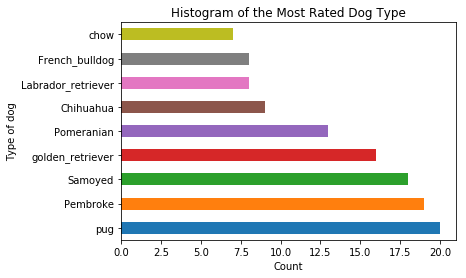

In [648]:
df_dog_type = df.groupby('breed').filter(lambda x: len(x) < 100 and len(x) > 4)
df_dog_type['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

Out of all the most frequent dog breeds, Pembroke is receiving the highest rating.

In [649]:
df_dog_type_mean = df_dog_type.groupby('breed').mean()

In [650]:
df_dog_type.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,stage,breed,retweet_count,favorite_count
10,890006608113172480,0,0,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,Koda,13.0,NaN,Samoyed,7088,29857
12,889665388333682689,0,0,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,None,13.0,puppo,Pembroke,9705,46810
13,889638837579907072,0,0,2017-07-25 00:10:02,Twitter for iPhone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10.0,Ted,12.0,NaN,French_bulldog,4384,26387
14,889531135344209921,0,0,2017-07-24 17:02:04,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,13.0,puppo,golden_retriever,2177,14716
19,888078434458587136,0,0,2017-07-20 16:49:33,Twitter for iPhone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10.0,Gerald,12.0,NaN,French_bulldog,3371,21176


In [651]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

In [652]:
df_dog_type_sorted

breed
Chihuahua              9.333333
French_bulldog        10.625000
pug                   10.750000
Pomeranian            11.153846
Labrador_retriever    11.250000
golden_retriever      11.562500
Samoyed               11.944444
chow                  12.000000
Pembroke              12.368421
Name: rating, dtype: float64

### Analysis of retweet and favorite counts

In [653]:
print('%s\t%s' % ('Mean Retweet Count', round(df.retweet_count.mean())))
print('%s\t%s' % ('Mean Favorite Count', round(df.favorite_count.mean())))

Mean Retweet Count	2618.0
Mean Favorite Count	8634.0


#### When the dog is rated greater than 10

In [654]:
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.rating_numerator > 10].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.rating_numerator > 10].mean())))

Mean Retweet Count	3659.0
Mean Favorite Count	12478.0


##### When the dog has a name

In [655]:
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.name != 'None'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.name != 'None'].mean())))

Mean Retweet Count	2578.0
Mean Favorite Count	9022.0


#### Categorized on dog-stage

In [656]:
print('Doggo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'doggo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'doggo'].mean())))

print('Floofer')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'floofer'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'floofer'].mean())))

print('Pupper')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'pupper'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'pupper'].mean())))

print('Puppo')
print('%s\t%s' % ('Mean Retweet Count', 
                  round(df.retweet_count[df.stage == 'puppo'].mean())))
print('%s\t%s' % ('Mean Favorite Count', 
                  round(df.favorite_count[df.stage == 'puppo'].mean())))

Doggo
Mean Retweet Count	6986.0
Mean Favorite Count	19885.0
Floofer
Mean Retweet Count	4631.0
Mean Favorite Count	12546.0
Pupper
Mean Retweet Count	2222.0
Mean Favorite Count	6935.0
Puppo
Mean Retweet Count	6208.0
Mean Favorite Count	21580.0


In [657]:
df.name.value_counts()

None         644
Charlie       10
Cooper        10
Lucy          10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Daisy          7
Lola           7
Toby           7
Bo             6
Jax            6
Koda           6
Stanley        6
Bella          6
Scout          5
Louis          5
Milo           5
Bailey         5
Dave           5
Chester        5
Buddy          5
Leo            5
Rusty          5
Oscar          5
Phil           4
Bear           4
Duke           4
            ... 
Wishes         1
Millie         1
Alf            1
Alexander      1
Wiggles        1
Stephanus      1
Keet           1
Travis         1
Danny          1
Jeb            1
Willem         1
Luther         1
Terrance       1
Mabel          1
Blitz          1
Crawford       1
Rontu          1
Tuck           1
Fwed           1
Dex            1
Opie           1
Snicku         1
Rumpole        1
Malikai        1
Jarod          1
Augie          1
Happy          1
Angel         

----

## Insight and Visualization

### Insight 1 Tweets posted by WeRateDogs decreased over time

In [658]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

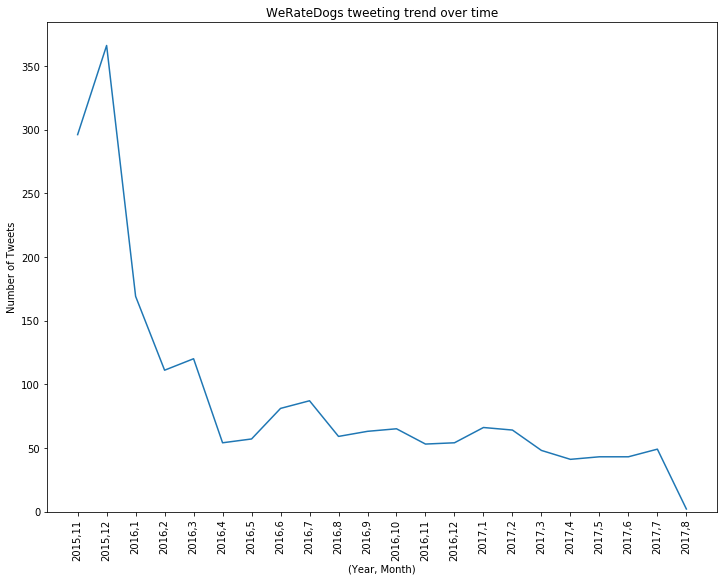

In [708]:
data = df.tweet_id.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count()
ax = data.plot('line', title='WeRateDogs tweeting trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.xticks(range(len(data.index)), data.index.map('{0[0]},{0[1]}'.format), rotation=90)
plt.savefig('tweet_trend')

### Insight 2 Both retweets and favourites have been growing upwards very fast which indicates that WeRateDogs has been gaining popularity

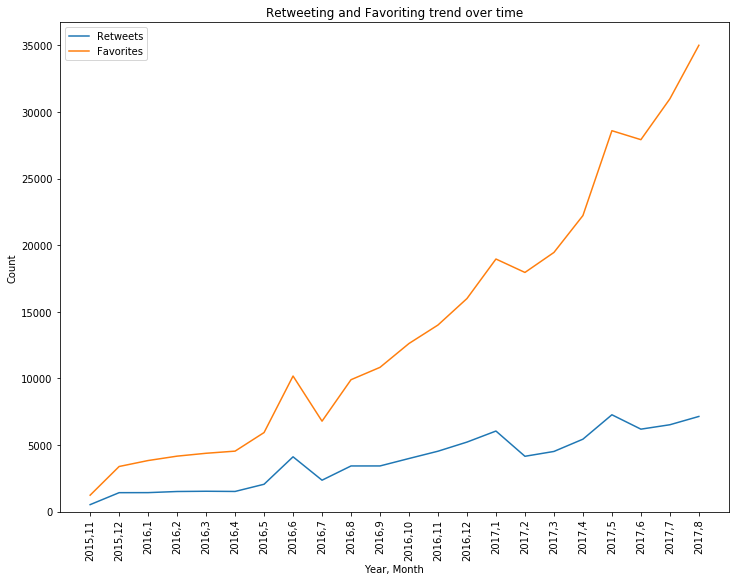

In [714]:
# plt.subplots(1, sharex=True)
retweet_count_grouped = df.retweet_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean()
retweet_count_grouped.plot('line')
df.favorite_count.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).mean().plot('line').set_ylim(0, )
plt.title('Retweeting and Favoriting trend over time')
plt.ylabel('Count')
plt.xlabel(('Year, Month'))
plt.legend(('Retweets', 'Favorites'))
plt.xticks(range(len(retweet_count_grouped.index)), retweet_count_grouped.index.map('{0[0]},{0[1]}'.format), rotation=90)
plt.savefig('ret_fav')

### Insight 3 Most dogs are rated 10.0 - 12.0 

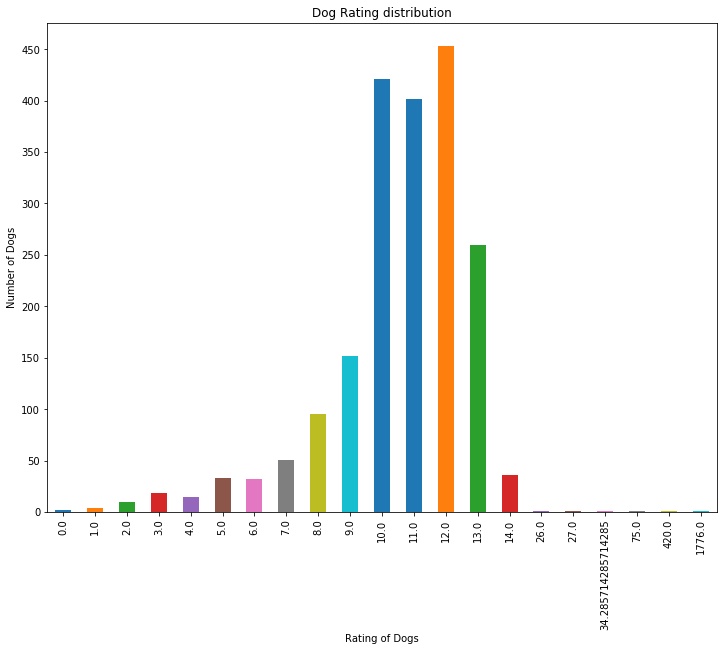

In [733]:
ax = df.rating.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating of Dogs")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

### Insight 4 Out of all the dogs that can be predicted, **pub, Pembroke, Samoyed, golden_retriever, Pomeranian** are the most frequently appeared

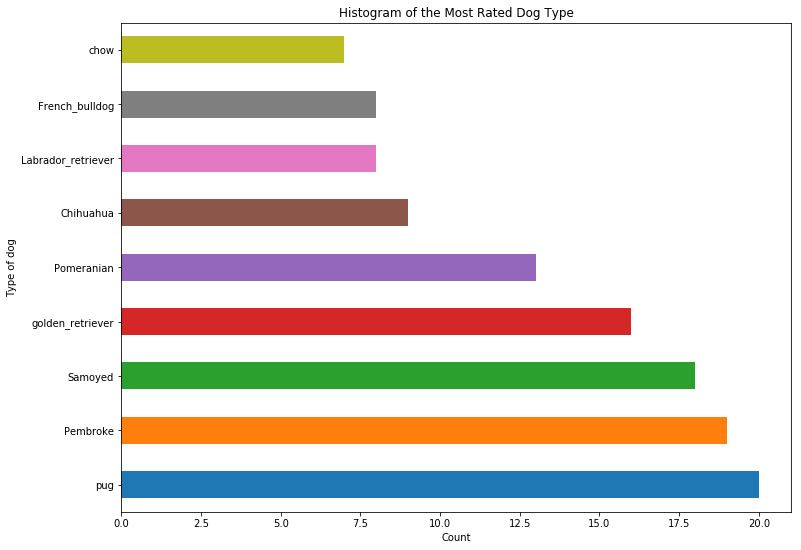

In [566]:
df_dog_type = df.groupby('breed').filter(lambda x: len(x) < 100 and len(x) > 4)
df_dog_type['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### Insight 5 WeRateDogs has posted 98% of the tweets from iPhone

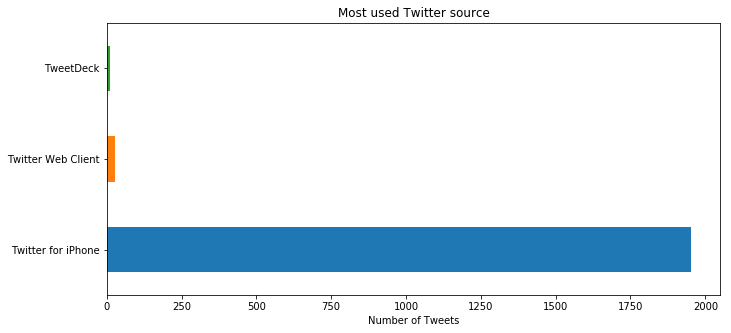

In [568]:
df['source'].value_counts().plot('barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

### The most common dog name is Cooper, Charlie, Lucy and Oliver

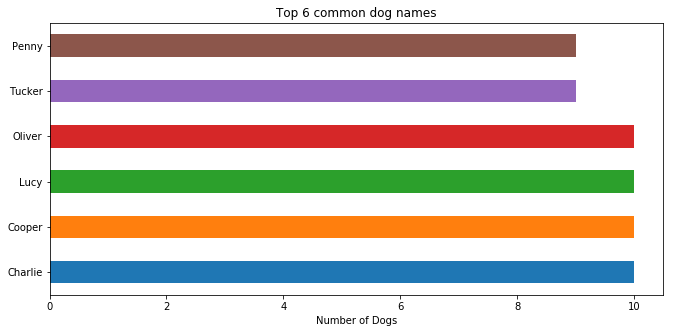

In [570]:
df.name.value_counts()[1:7].plot('barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')